In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('autos.csv')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:

df['gearbox'].unique()
#Iremos levar em conta os não especificados em nossas análises

array(['manuell', 'automatik', 'Unspecified'], dtype=object)

In [7]:
print(df['powerPS'].mean())
print(df['powerPS'].max()) #Esse valor é com certeza um outlier, uma Buggatti não chega nem perto desse valor
print(df['powerPS'].min())

109.56425035146499
20000
0


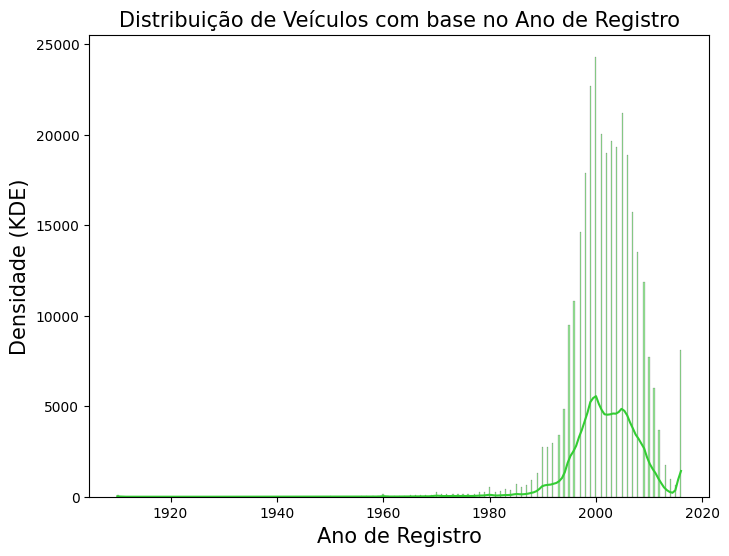

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

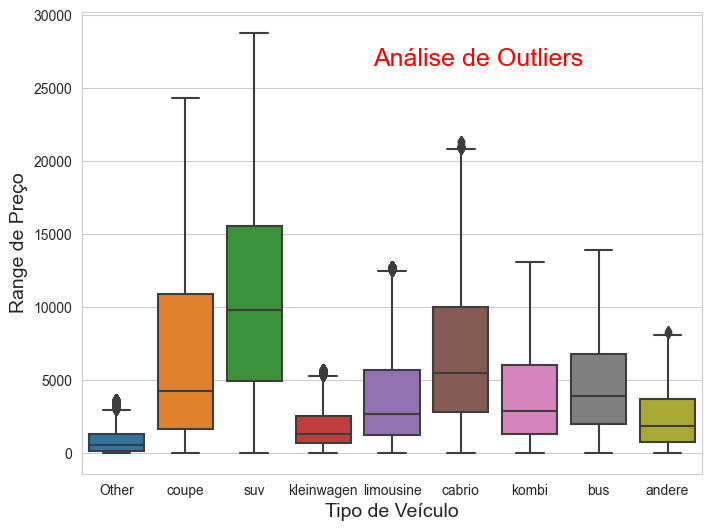

In [17]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

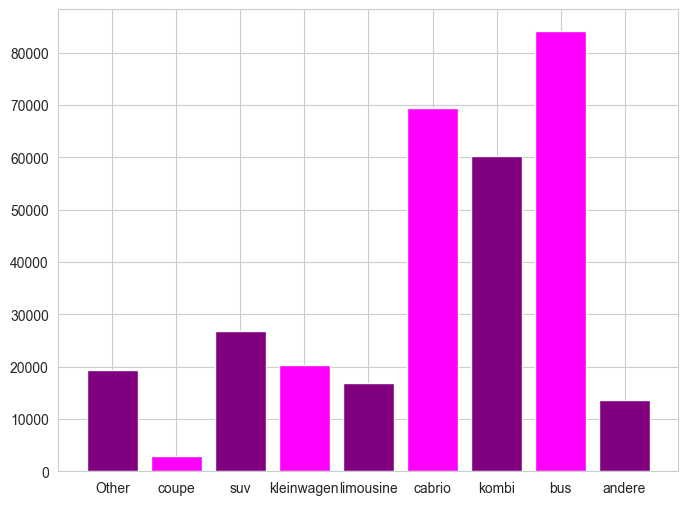

In [28]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
y = df.groupby('vehicleType')['dateCrawled'].count()
x = df['vehicleType'].unique()
plt.bar(x, y, color=['purple', 'magenta'])
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

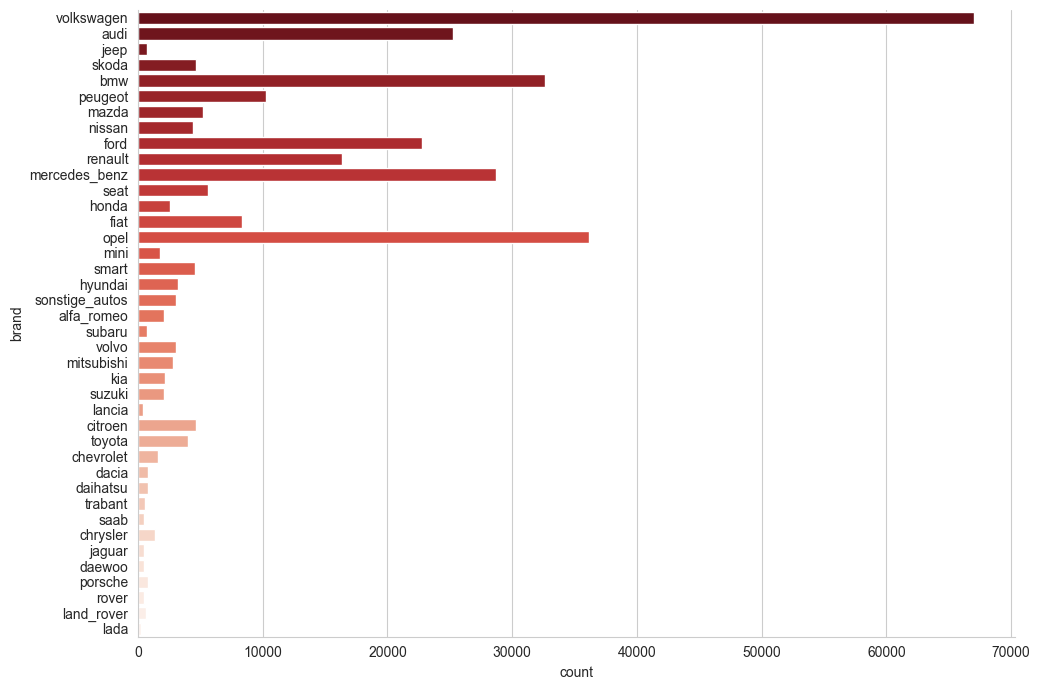

In [37]:
sns.catplot(y="brand", data=df, kind="count", palette="Reds_r", height=7, aspect=1.5)
ax.set_title("Veículos Por Marca",fontdict={'size':18})
ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

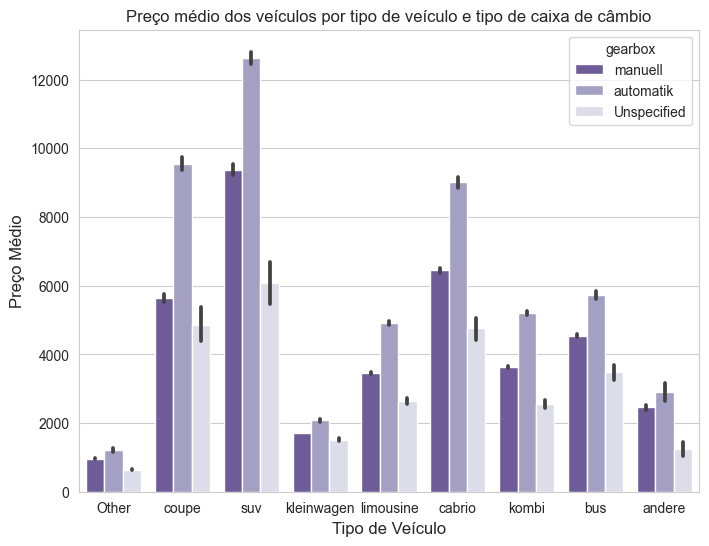

In [44]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette='Purples_r', data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

In [45]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


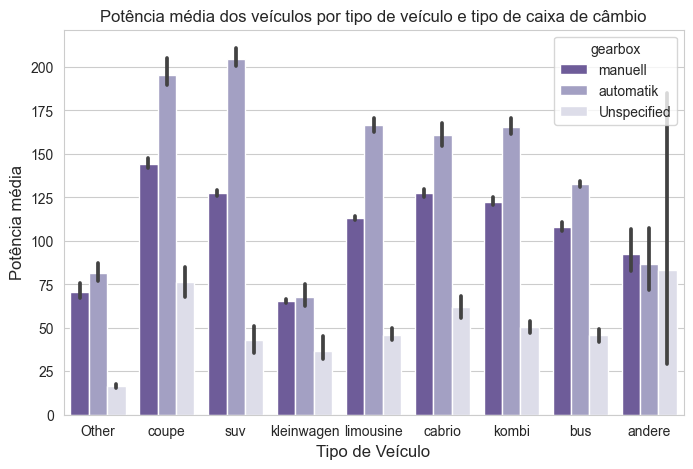

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox", palette='Purples_r', data=df)
ax.set_title("Potência média dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Potência média",fontdict= {'size':12})
plt.show()

<AxesSubplot: xlabel='kilometer', ylabel='price'>

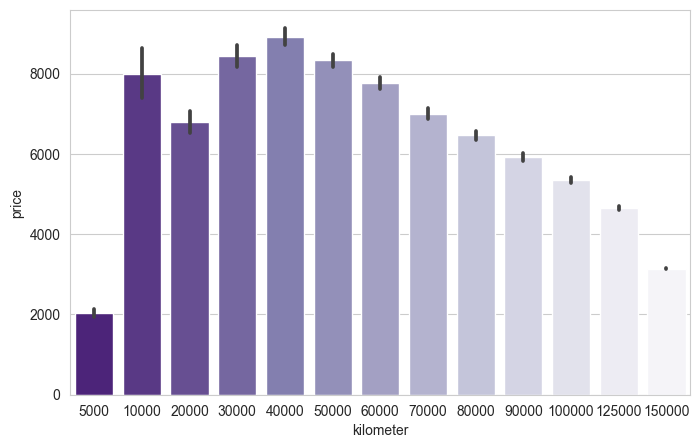

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="kilometer", y="price", palette='Purples_r', data=df)
#Há uma relação entre os dois dados

In [66]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [79]:
df_consulta2 = df.loc[(df["kilometer"]<=5000)]

In [82]:
df_consulta2.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
14,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Offer,450,test,kleinwagen,1910,Unspecified,0,...,24148,2016-03-19 08:46:47,2016,2016,March,March,8,8,106,11
25,2016-03-09 11:56:38,Volkswagen_T3_andere,privat,Offer,1990,test,bus,1981,manuell,50,...,87471,2016-03-10 07:44:33,2016,2016,March,March,1,7,35,11
45,2016-04-04 10:57:36,Verkaufe_meinen_kleinen_wegen_neu_Anschaffung,privat,Offer,1400,control,Other,2016,manuell,55,...,34454,2016-04-06 12:45:43,2016,2016,April,April,2,12,0,11
102,2016-03-20 18:53:27,Polo_6n_Karosse_zu_verschenken,privat,Offer,0,test,kleinwagen,1999,Unspecified,0,...,37520,2016-04-07 02:45:22,2016,2016,March,March,18,2,17,11
137,2016-03-22 16:37:59,Fiat_Scudo_Bulli_Werkstattwagen_Diesel,privat,Offer,0,test,Other,2006,Unspecified,0,...,44867,2016-04-06 06:17:56,2016,2016,March,March,15,6,10,11


In [81]:
#filtro= df.loc[(df["kilometer"]<=5000)]
df_consulta = df[df['kilometer'].isin([4000,5000])]
df_consulta.head() 
df_consulta.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,5420.000000,5420.000000,5420.000000,5420.0,5420.000000,5420.0,5420.0,5420.000000,5420.000000,5420.000000,5420.000000
mean,2041.683579,1997.180258,79.852214,5000.0,45891.923432,2016.0,2016.0,8.528044,11.639114,18.819742,8.241697
std,3810.639539,15.237003,524.357560,0.0,25349.490974,0.0,0.0,8.586552,6.519834,15.237003,3.536783
min,0.000000,1910.000000,0.000000,5000.0,1069.000000,2016.0,2016.0,0.000000,0.000000,0.000000,1.000000
25%,50.000000,1995.000000,0.000000,5000.0,26506.000000,2016.0,2016.0,2.000000,6.000000,11.000000,6.000000
50%,600.000000,2000.000000,39.000000,5000.0,45132.000000,2016.0,2016.0,6.000000,12.000000,16.000000,11.000000
75%,2100.000000,2005.000000,105.000000,5000.0,64646.000000,2016.0,2016.0,13.000000,17.000000,21.000000,11.000000
max,28800.000000,2016.000000,17410.000000,5000.0,99998.000000,2016.0,2016.0,76.000000,23.000000,106.000000,11.000000


In [83]:
from sklearn.linear_model import LinearRegression

In [92]:
X = df.kilometer
Y = df.price
Z = df.yearOfCreation
modelo = LinearRegression()

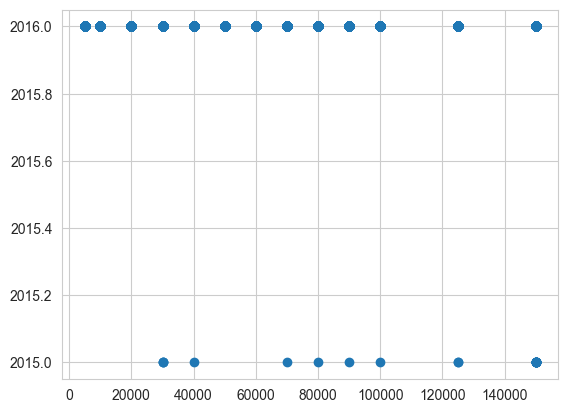

In [97]:

plt.scatter(X, Z)

Minha idéia inicial era tentar realizar a predição do preço do carro ao longo de sua kilometragem, mas é fácil ver que são da mesma dimensão